In [1]:
# Expectation maximixing 
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


In [2]:
# Step 1. Simulate patient health data
np.random.seed(42)
data = {
    "Age": [25, 30, 35, np.nan, 50, 45, np.nan, 60],
    "Blood Pressure": [120, 130, np.nan, 110, 140, np.nan, 135, 150],
    "Heart Rate": [72, 75, 70, np.nan, 80, 85, 78, np.nan],
}

df = pd.DataFrame(data)
print("Original data with missing values:\n", df)

Original data with missing values:
     Age  Blood Pressure  Heart Rate
0  25.0           120.0        72.0
1  30.0           130.0        75.0
2  35.0             NaN        70.0
3   NaN           110.0         NaN
4  50.0           140.0        80.0
5  45.0             NaN        85.0
6   NaN           135.0        78.0
7  60.0           150.0         NaN


In [17]:
# Step 2. Handle missing values roughly (mean imputation as initialization)
imputer = SimpleImputer(strategy="mean")
X_init = imputer.fit_transform(df)

[[ 25.         120.          72.        ]
 [ 30.         130.          75.        ]
 [ 35.         130.83333333  70.        ]
 [ 40.83333333 110.          76.66666667]
 [ 50.         140.          80.        ]
 [ 45.         130.83333333  85.        ]
 [ 40.83333333 135.          78.        ]
 [ 60.         150.          76.66666667]]


In [23]:
# Step 3. Apply EM using Gaussian Mixture
gmm = GaussianMixture(n_components=2, max_iter=100, random_state=42)
gmm.fit(X_init)

# Step 4. Replace missing values with EM-based estimates
X_completed = X_init.copy()
missing_mask = df.isnull().values

for i in range(len(df)):
    if missing_mask[i].any():
        # Sample from GMM to estimate missing values (approximation)
        X_completed[i] = gmm.sample(1)[0]

# Step 5. Create completed DataFrame
completed_df = pd.DataFrame(X_completed, columns=df.columns)
print("\nImputed Data (after EM):\n", completed_df.round(2))


[[False False False]
 [False False False]
 [False  True False]
 [ True False  True]
 [False False False]
 [False  True False]
 [ True False False]
 [False False  True]]

Imputed Data (after EM):
      Age  Blood Pressure  Heart Rate
0  25.00          120.00       72.00
1  30.00          130.00       75.00
2  41.87          133.13       80.78
3  41.87          133.13       80.78
4  50.00          140.00       80.00
5  41.87          133.13       80.78
6  41.87          133.13       80.78
7  41.87          133.13       80.78


C:\Users\Freef\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


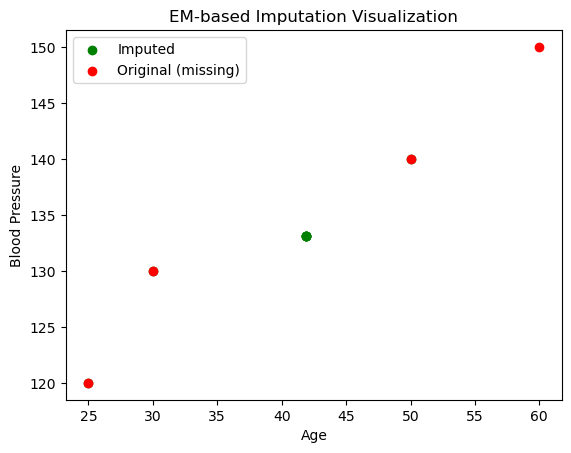

In [25]:

plt.scatter(
    completed_df["Age"], completed_df["Blood Pressure"], color="green", label="Imputed"
)
plt.scatter(df["Age"], df["Blood Pressure"], color="red", label="Original (missing)")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.title("EM-based Imputation Visualization")
plt.legend()
plt.show()
